<a href="https://colab.research.google.com/github/alexander-toschev/cv-course/blob/main/NN_withNumpyAndKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4614 - loss: 0.6984 - val_accuracy: 0.3625 - val_loss: 0.6989
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5562 - loss: 0.6900 - val_accuracy: 0.5250 - val_loss: 0.6892
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6448 - loss: 0.6703 - val_accuracy: 0.6500 - val_loss: 0.6639
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.6375 - val_accuracy: 0.7125 - val_loss: 0.6238
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.5953 - val_accuracy: 0.7875 - val_loss: 0.5694
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.5387 - val_accuracy: 0.8250 - val_loss: 0.4995
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8644 - loss: 0.4758 - val_accuracy: 0.9000 - val_loss: 0.4203
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - loss: 0.4108 - val_accuracy: 0.9250 - val_loss

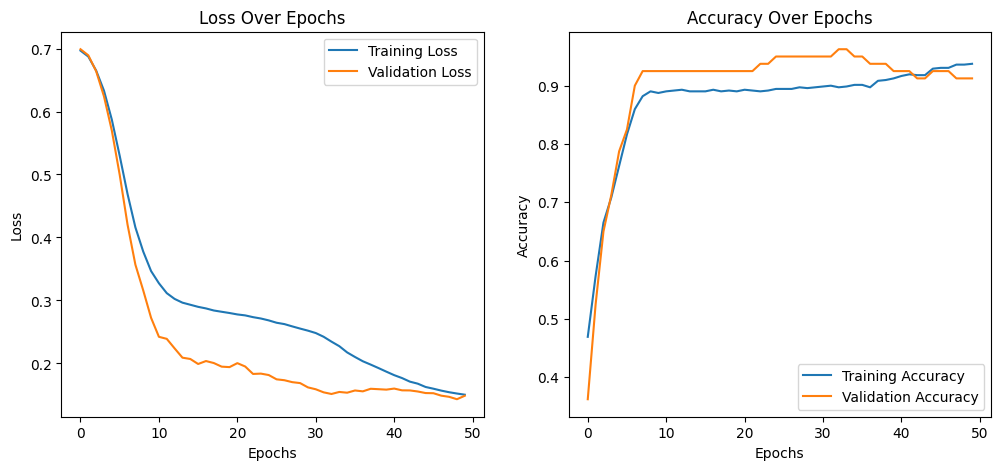

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Создание синтетического датасета для бинарной классификации
X, y = make_classification(
    n_samples=1000,  # Количество образцов
    n_features=2,  # Количество признаков
    n_classes=2,  # Количество классов (бинарная классификация)
    n_clusters_per_class=1,
    n_redundant=0,
    random_state=42
)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков (нормализация)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение архитектуры нейросети
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Первый скрытый слой
model.add(Dense(6, activation='relu'))               # Второй скрытый слой
model.add(Dense(6, activation='relu'))               # Третий скрытый слой
model.add(Dense(6, activation='relu'))               # Третий скрытый слой
model.add(Dense(4, activation='relu'))               # Четвертый скрытый слой
model.add(Dense(1, activation='sigmoid'))            # Выходной слой для бинарной классификации

# Компиляция модели
model.compile(
    loss='binary_crossentropy',  # Функция потерь для бинарной классификации
    optimizer=Adam(learning_rate=0.001),  # Оптимизатор Adam
    metrics=['accuracy']  # Метрика точности
)

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# График изменения функции потерь и точности
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


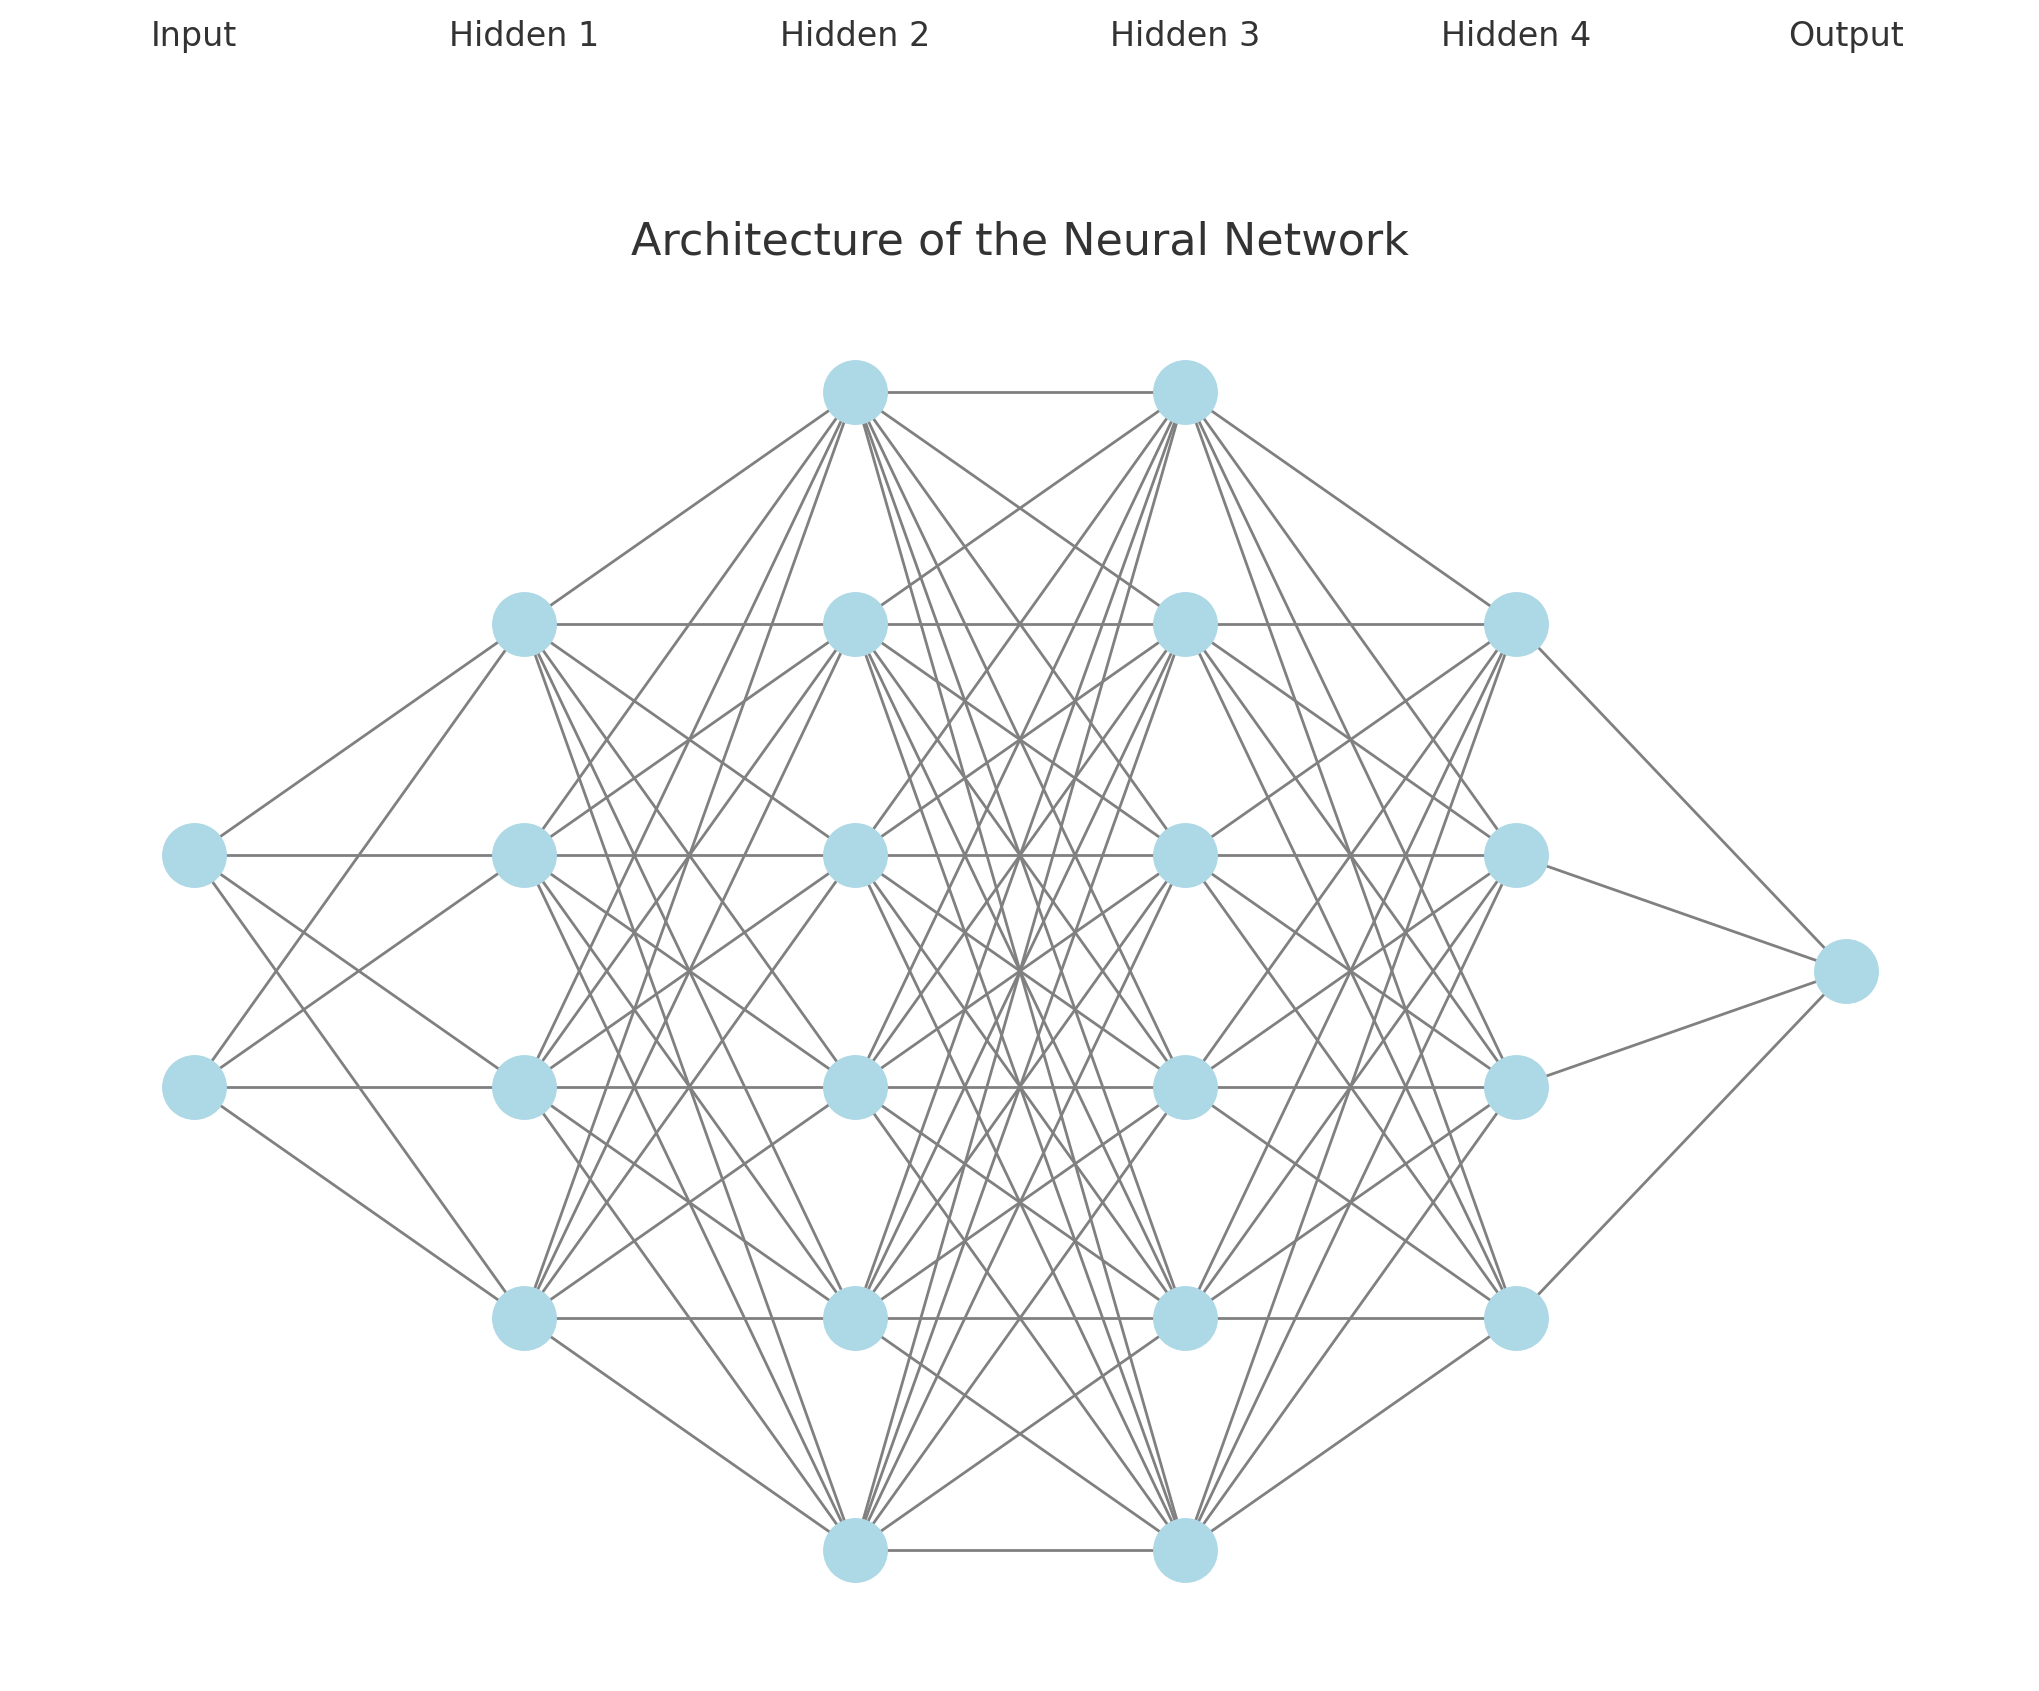

Epoch 1/50, Loss: 0.6932
Epoch 11/50, Loss: 0.6932
Epoch 21/50, Loss: 0.6932
Epoch 31/50, Loss: 0.6932
Epoch 41/50, Loss: 0.6932


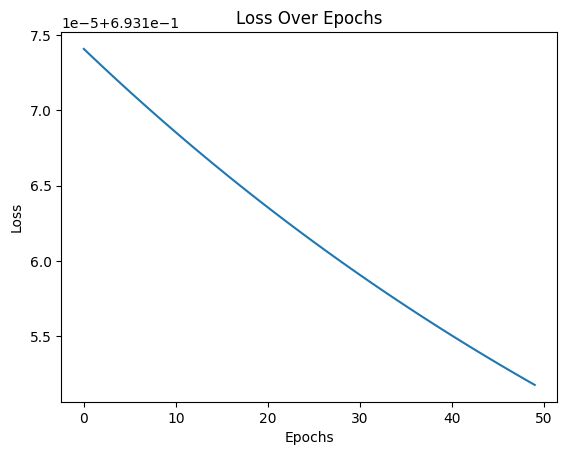

Test Accuracy: 0.4950


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Сигмоида и её производная
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Функция потерь — бинарная кросс-энтропия
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10  # Защита от логарифма 0
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Инициализация весов
def init_weights(layers):
    weights = {}
    for i in range(1, len(layers)):
        weights[f"W{i}"] = np.random.randn(layers[i], layers[i - 1]) * 0.1
        weights[f"b{i}"] = np.zeros((layers[i], 1))
    return weights

# Прямое распространение
def forward_propagation(X, weights):
    activations = {"A0": X.T}
    Z = {}
    for i in range(1, len(weights) // 2 + 1):
        Z[f"Z{i}"] = weights[f"W{i}"].dot(activations[f"A{i-1}"]) + weights[f"b{i}"]
        activations[f"A{i}"] = sigmoid(Z[f"Z{i}"]) if i < len(weights) // 2 else sigmoid(Z[f"Z{i}"])
    return Z, activations

# Обратное распространение
def backward_propagation(y_true, Z, activations, weights):
    grads = {}
    L = len(weights) // 2  # Количество слоев
    m = y_true.shape[0]
    y_true = y_true.reshape(-1, 1).T

    # Производная для выходного слоя
    dZL = activations[f"A{L}"] - y_true
    grads[f"dW{L}"] = dZL.dot(activations[f"A{L - 1}"].T) / m
    grads[f"db{L}"] = np.sum(dZL, axis=1, keepdims=True) / m

    # Производные для скрытых слоев
    for i in range(L - 1, 0, -1):
        dZi = (weights[f"W{i + 1}"].T.dot(dZL)) * sigmoid_derivative(Z[f"Z{i}"])
        grads[f"dW{i}"] = dZi.dot(activations[f"A{i - 1}"].T) / m
        grads[f"db{i}"] = np.sum(dZi, axis=1, keepdims=True) / m
        dZL = dZi

    return grads

# Обновление весов
def update_weights(weights, grads, learning_rate):
    for i in range(1, len(weights) // 2 + 1):
        weights[f"W{i}"] -= learning_rate * grads[f"dW{i}"]
        weights[f"b{i}"] -= learning_rate * grads[f"db{i}"]

# Обучение модели
def train(X, y, layers, epochs=50, learning_rate=0.001):
    weights = init_weights(layers)
    losses = []

    for epoch in range(epochs):
        # Прямое и обратное распространение
        Z, activations = forward_propagation(X, weights)
        loss = binary_cross_entropy(y, activations[f"A{len(layers) - 1}"].T)
        losses.append(loss)

        grads = backward_propagation(y, Z, activations, weights)
        update_weights(weights, grads, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return weights, losses

# Предсказания модели
def predict(X, weights):
    _, activations = forward_propagation(X, weights)
    A_final = activations[f"A{len(weights) // 2}"].T
    return (A_final > 0.5).astype(int)

# Генерация синтетического датасета
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,  # Количество выборок
    n_features=2,  # Общее число признаков
    n_informative=2,  # Количество информативных признаков
    n_redundant=0,  # Линейные комбинации информативных признаков
    n_repeated=0,  # Повторяющиеся признаки
    n_classes=2,  # Два класса
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение архитектуры: 2 входа, 4 скрытых слоя, 1 выход
layers = [2, 4, 6, 6, 4, 1]

# Обучение модели
weights, losses = train(X_train, y_train, layers, epochs=50, learning_rate=0.01)

# График функции потерь
plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Оценка точности модели на тестовой выборке
y_pred = predict(X_test, weights)
accuracy = np.mean(y_pred.flatten() == y_test)
print(f"Test Accuracy: {accuracy:.4f}")
